In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib.pyplot import figure

### Utils

In [54]:
def get_accuracy(data, way, shot):
    data_select = data[(data['train_shot'] == shot) & (data['way'] == way)]
    max_acc = data_select.accuracy.max()
    return max_acc
    
    
def get_best_params(data, way, shot):
    data_select = data[(data['train_shot'] == shot) & (data['way'] == way)]
    max_acc = data_select.accuracy.max()
    return data_select[data_select['accuracy'] == max_acc]

### Basic model

In [76]:
data = pd.read_csv('results/06-05-2019/basic_model.csv')
data.head(1)

,way,train_shot,test_shot,x_dim,z_dim,optimizer,lr,initialization,channels,loss,trials,silent,split,in_alphabet,add_rotations,gpu,accuracy,duration_sec
0,5,1,1,28,50,adam,0.01,xavier_normal,1,MSELoss(),100,True,test,False,True,0,0.226,7.880399


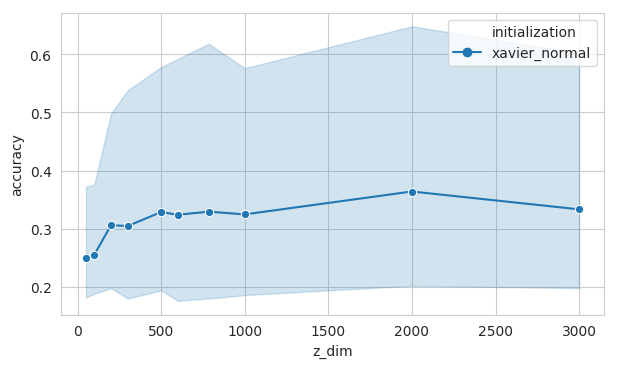

In [77]:
z_dim_results = data[(data['train_shot'] == 5) & (data['lr'] == 0.001)]
figure(num=None, figsize=(7, 4), dpi=100, facecolor='w', edgecolor='k')
sns.lineplot(data=z_dim_results, x='z_dim', y='accuracy', markers=True, marker="o", 
             dashes=False, style="initialization", hue="initialization")

In [78]:
for way in sorted(np.unique(data['way'])):
    for shot in sorted(np.unique(data['train_shot'])):
        acc = get_accuracy(data, way, shot)
        print(f"{way}-way-{shot}-shot: {acc}")
    print()

5-way-1-shot: 0.3620000000000001
5-way-3-shot: 0.5520000000000002
5-way-5-shot: 0.6479999999999998
5-way-10-shot: 0.7639999999999999



### Basic augmentation

In [61]:
data = pd.read_csv('results/06-05-2019/simple_augmentation.csv')

In [62]:
for way in sorted(np.unique(data['way'])):
    for shot in sorted(np.unique(data['train_shot'])):
        acc = get_accuracy(data, way, shot)
        print(f"{way}-way-{shot}-shot: {acc}")
    print()

5-way-1-shot: 0.522
5-way-3-shot: 0.6879999999999998
5-way-5-shot: 0.768
5-way-10-shot: 0.86



In [63]:
get_best_params(data, 5, 5)

,way,train_shot,test_shot,x_dim,z_dim,optimizer,lr,initialization,channels,loss,trials,silent,split,in_alphabet,add_rotations,gpu,accuracy,duration_sec
550,5,5,1,28,300,adam,0.001,xavier_normal,1,MSELoss(),100,True,test,False,True,1,0.768,57.343625
